#### Isobaric_LH2

* This notebook sets up the isobaric evaporation of liquid hydrogen in a retrofitted LNG storage tank
* Coolprop will be called to retrieve the cryogen thermophysical properties. Hence, the cryogen will be specificied in the notebook

## Desired input and output
* Tank characteristics: .CSV file with tank geometrical properties
* Cryogen: .CSV file with the cryogen ID consistent with coolprop
* Popular cryogens: hydrogen, methane, nitrogen, oxygen.


In [3]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from storage_tanks import Tank

# Import Cryogen class
from cryogens import Cryogen

#### Use example

Analyse BOG rates of liquid hydrogen in a retrofitted LNG storage tank,and compare it to methane BOG rates

In [4]:
# Retrofitted LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 76.4 # Internal diameter / m
d_o = 80   # External diameter / m
T_air = 293.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.0371 # W/m2/K
U_V = 0.0371 # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 60000 # W, 

# Vertically orientated cylindrical tank volume
V_tank = 165000 #m^3

# Initial liquid filling / Dimensionless
LF = 0.97 

# Specify tank operating pressure
P = 100000 # Pa

# Initialize tank
large_tank = Tank(d_i, d_o, V_tank, LF)
large_tank.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b)

In [5]:
methane = Cryogen(name = "methane")
methane.set_coolprops("methane", P)
large_tank.cryogen = methane
print("The evaporation rate of " + methane.name + " is %.1f kg/h" % (large_tank.b_l_dot * 3600))

# Initialise hydrogen using CoolProp dependency
hydrogen = Cryogen(name="hydrogen")
# Initialise thermodynamic properties at the tank operating pressure
hydrogen.set_coolprops(hydrogen.name, P)
large_tank.cryogen = hydrogen

# Evaporation rate
print("The evaporation rate of " + hydrogen.name + " in the tank is %.1f kg/h" % (large_tank.b_l_dot * 3600))
print("Equivalent to  %.1f g/s" % (large_tank.b_l_dot * 1000))

The evaporation rate of methane is 416.5 kg/h
The evaporation rate of hydrogen in the tank is 712.2 kg/h
Equivalent to  197.8 g/s


Liquid nitrogen properties for Linde tank calculations

In [25]:
# Initialise hydrogen using CoolProp dependency
nitrogen = Cryogen(name="nitrogen")

# Initialise thermodynamic properties at the tank operating pressure
nitrogen.set_coolprops(nitrogen.name, P)


BOR = 0.19e-2
m_evap = 80.36 * 0.95 * nitrogen.rho_L * BOR
print("m_evap %.3f" % m_evap)
dH_LV = nitrogen.h_V - nitrogen.h_L
Q_in = (m_evap * dH_LV)
print("Q_in = %.3f J" % Q_in)

# Total heat transfer rate to the liquid
Q_L_in = (Q_in / (3600*24))

print("Q_L_in = %.3f W" % Q_L_in)

# 
d_o = 3

# Side area
A_L = (np.pi * d_o) * (18.05 * 0.95) 

# Bottom area
A_t = np.pi * d_o**2/4 

# Environment temperature # 25°C

T_air = 298.15
print("A_L = %.3f m^2, A_T = %.3f m^2" %(A_L, A_t))

U = Q_L_in/((A_L +A_t) * (T_air - nitrogen.T_sat) )
print("U = %.3e W m^-2 K^-1 " % U)

m_evap 116.996
Q_in = 23319563.429 J
Q_L_in = 269.902 W
A_L = 161.611 m^2, A_T = 7.069 m^2
U = 7.243e-03 W m^-2 K^-1 


In [20]:
A_L

161.61138008229295

#### Simulate liquid hydrogen evaporation 

In [7]:
hydrogen.rho_L / hydrogen.rho_V

53.856516758832946

In [8]:
large_tank.evaporate(3600*24*7*52)

Text(0, 0.5, '$ V_L / m^3$')

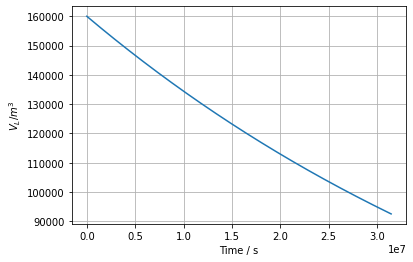

In [9]:
# Access to the liquid volume
plt.plot(large_tank.sol.t, large_tank.sol.y[0])
plt.grid()
plt.xlabel('Time / s')
plt.ylabel('$ V_L / m^3$')

Text(0, 0.5, '$ B_L / kg/h$')

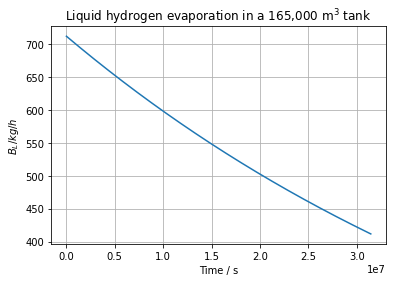

In [10]:
# Extract evaporation rate and convert to kg/h
B_L = large_tank.evap_rate() * 3600

# Visualise evaporation rate
plt.plot(large_tank.sol.t, B_L) 
plt.grid()
plt.title("Liquid hydrogen evaporation in a 165,000 m$^3$ tank")
plt.xlabel('Time / s')
plt.ylabel('$ B_L / kg/h$')